一个Service包括两个东西: engine & connector, 一个Service只能有一个engine, 但可以有多个connector. 每个connector负责一种协议的连接, 例如HTTP connector, AJP connector, 这两个connectors会把所有连接请求转给engine. 

现在分清关系, `Service` resides in a `Server`, and has two components: `Connectors` & `Engine`, and an engine can have multiple `Hosts`. 

- A `Context` represents a web application. A `Host` may contain multiple `contexts`, each with a unique path.
- A `Host` is an association of a network name, e.g. www.yourcompany.com, to the Tomcat server

```
                ->HTTP Connector
Server->Service ->Engine-> Hosts-> Contexts
                -> AJP Connector
```

Engine的一切数据来源都是Connector，客户端任何一次资源请求都会发送到connector上，并从connector转发给Engine。Engine构建响应后，再次将响应数据转发给Connector，并由Connector做一些处理(如加上首部字段)回复给客户端。

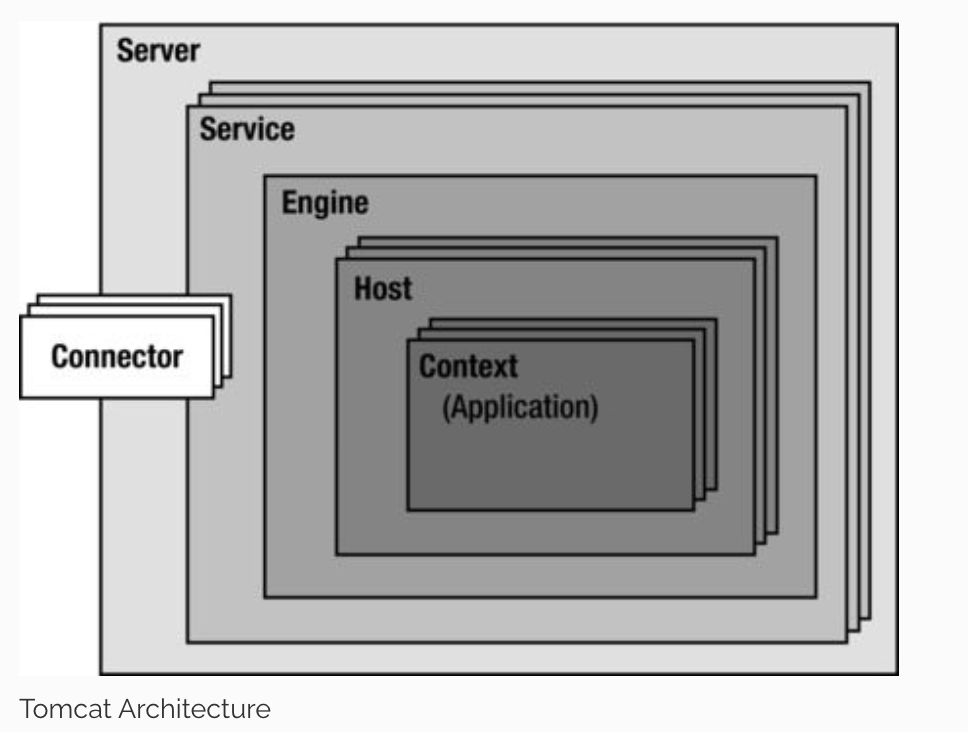

---

In the Tomcat world, a **Server** represents the whole container.

A **Service** is an intermediate component which lives inside a Server and ties one or more Connectors to exactly one Engine. 

An **Engine** represents request processing pipeline for a specific Service. It receives and processes all requests from one or more Connectors, and returns the completed response to the Connector for ultimate transmission back to the client.

A **Connector** handles communications with the client. There are multiple connectors available with Tomcat. These include the HTTP connector which is used for most HTTP traffic, especially when running Tomcat as a standalone server, and the AJP connector which implements the AJP protocol used when connecting Tomcat to a web server such as Apache HTTPD server. Creating a customized connector is a significant effort.

A **Host** is an association of a network name, e.g. www.yourcompany.com, to the Tomcat server. An Engine may contain multiple hosts, and the Host element also supports network aliases such as yourcompany.com and abc.yourcompany.com.

A **Context** represents a web application. A Host may contain multiple contexts, each with a unique path. 

# 开篇
---

写Java Web的时候(JSP+Servlet), 我确实定义了好多类(各种处理逻辑的servlet), 但从来没有用过他们, 什么意思呢, 就是从来没有`new`过他们, 就好像我们随便写个Java类然后继承HttpServlet, 里面实现什么`doPost()` method, 然后当来对应的http请求的时候, 他们自动就会被调用, 这真的很神奇, 然后还没用过main函数, 这是怎么回事?

# Servlet
---

先看看我们是怎么用的, 

```java
public class LoginServlet extends HttpServlet {
    public void doPost(HttpServletRequest request, HttpServletResponse response){
        String username = request.getParameter("username");
        String password = request.getParameter("password");
        ...
    }
}
```

可以看到我们自定义的servlet继承了HttpServlet, 这样就可以直接处理http请求了, 是不是很神奇, 但是用c处理http请求需要创建socket, 然后绑定ip监听某个端口, 但是这里没有, 那谁来处理来自clients的http requests?

答案是Tomcat(还记得上面说的connector吗), tomcat与clients直接打交道, 而我们自定义的Servlet最多算是Tomact用来跟client communicate的工具(别忘了tomcat是servlet container, 也就是我们写的servlet运行在tomcat上). 而Servlet本身则专注于处理逻辑代码,比如连接数据库, 执行查找数据然后筛选, 验证密码, balabala...

然后呢, 我们一般说一个东西只负责一件事, 那么servlet只负责逻辑代码, 那谁来负责形成html文件呢? 因为我们最终的目的是返回给clients html文件, 即我们把从数据库获得的数据插入到html中形成“动态“文件, 然后返回给clients, 把数据插入到html这就有了JSP. 